In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
%matplotlib inline

In [ ]:
#Mean,Medain and Mode

In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
np.mean(df['total_bill'])

np.float64(19.78594262295082)

In [4]:
np.median(df['total_bill'])

np.float64(17.795)

In [5]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

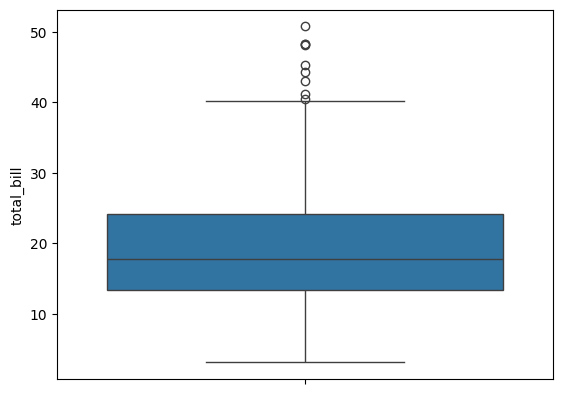

In [6]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

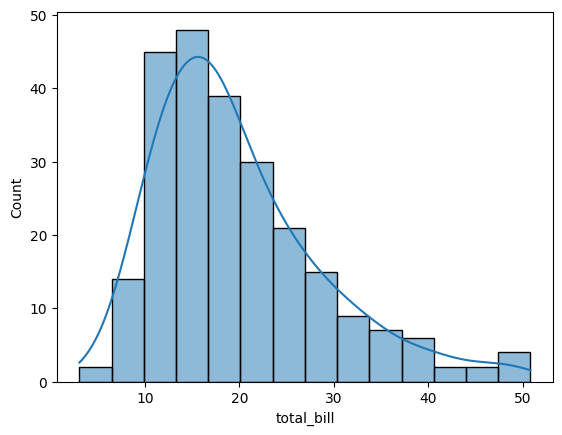

In [7]:
sns.histplot(df['total_bill'],kde=True)

In [8]:
df1=sns.load_dataset('iris')

In [9]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

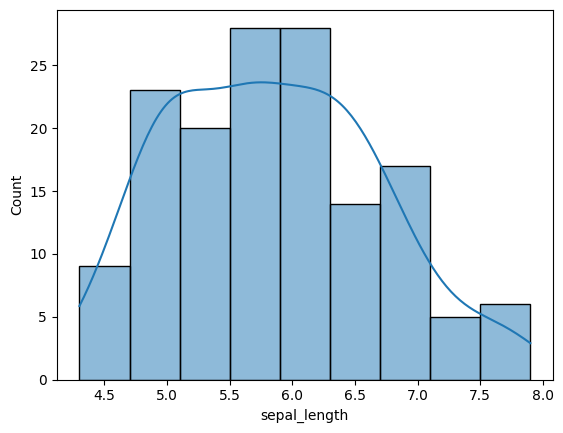

In [10]:
sns.histplot(df1['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

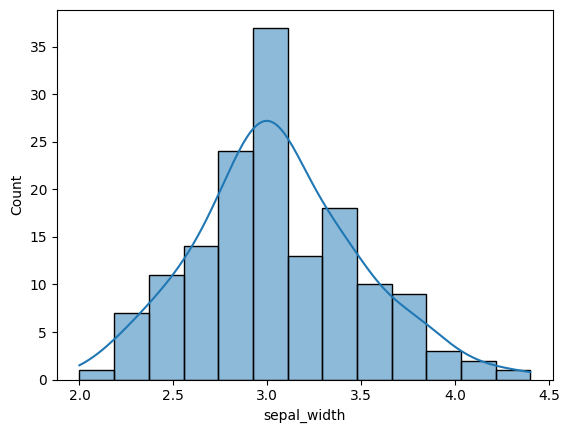

In [11]:
sns.histplot(df1['sepal_width'],kde=True)

<Axes: xlabel='count', ylabel='species'>

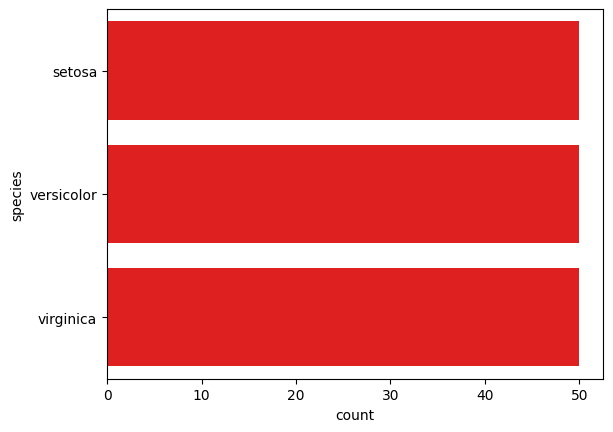

In [12]:
sns.countplot(df1['species'],color='r')

In [13]:
np.percentile(df1['sepal_length'],[25,99])

array([5.1, 7.7])

#Outliers


In [15]:
#Define Dataset
dataset=[11,10,20,14,50,60,90,120,12,45,21,67,100,250,300,91,34,45,43,27,88,87,95,99,75,77,71,65,63,66,55,53,59]


(array([ 8., 12.,  8.,  3.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 10.,  39.,  68.,  97., 126., 155., 184., 213., 242., 271., 300.]),
 <BarContainer object of 10 artists>)

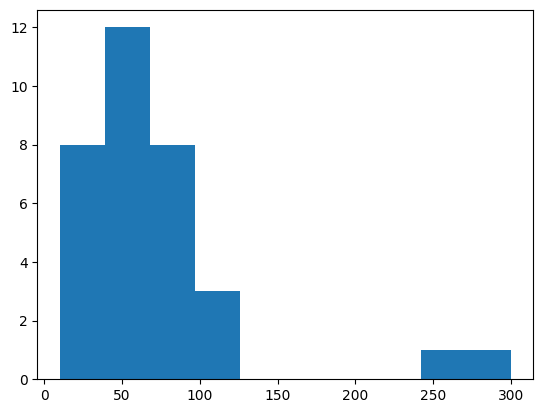

In [16]:
plt.hist(dataset)

#Z_Score for finding outlier

In [18]:
outliers=[]
def detect_outliers(data):
    threshold=3 ##3 std deviation
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers            
    

In [19]:
detect_outliers(dataset)

[250, 300]

IQR
1.Sorting the data
2.Calcualte Q1 and Q3
3.IQR(Q3-Q1)
4.Find the lower fence(Q1-1.5(IQR))
5.Find the Higher fence(Q3+1.5(IQR))


In [ ]:
dataset=sorted(dataset)


In [26]:
Q1=np.percentile(dataset,25)
Q3=np.percentile(dataset,75)

In [27]:
print(Q1)
print(Q3)

43.0
88.0


In [30]:
IQR=Q3-Q1
print(IQR)

45.0


In [37]:
#Finding lower fence and higher fence
lowerfence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lowerfence)
print(higher_fence)


-24.5
155.5


In [44]:
out = []
for val in dataset:
    if val < lowerfence or val > higher_fence:
        out.append(val)
print(out)


[250, 300]


<Axes: >

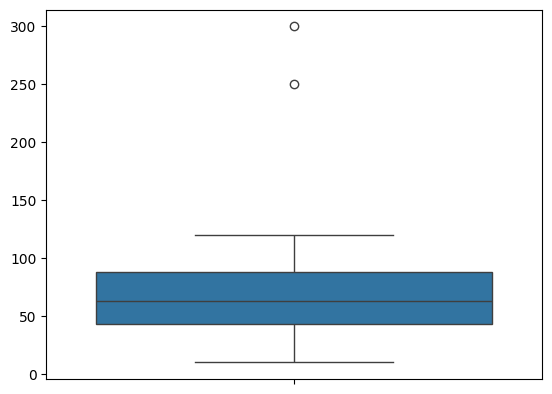

In [45]:
sns.boxplot(dataset)